<a href="https://colab.research.google.com/github/samyon7/Analys_Your_Data/blob/main/Pytorch_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [2]:
!uname -r

4.19.112+


In [3]:
!lscpu | grep 'Model name'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache"

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Thread(s) per core:  2
L3 cache:            46080K


In [4]:
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12539652 kB


In [5]:
!df -h / | awk '{print $4}'

Avail
73G


In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
import sys
print('The python version is', sys.version)

The python version is 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [8]:
from __future__ import print_function
import torch
print(torch.__version__)

1.6.0+cu101


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [14]:
#TENSOR BASICS!
x = torch.empty(5, 3)
print(x)

tensor([[4.1464e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [4.4721e+21, 1.5956e+25, 4.7399e+16],
        [3.7293e-08, 3.9664e+28, 6.9397e+22],
        [1.7260e+25, 2.2856e+20, 5.0948e-14]])


In [15]:
x.shape

torch.Size([5, 3])

In [18]:
a = torch.ones(3, dtype=torch.long)
x = torch.tensor([5.5, 3])

print(a)
print(x)

tensor([1, 1, 1])
tensor([5.5000, 3.0000])


In [19]:
# Creating a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype
x = x.new_ones(5, 3, dtype=torch.double) 
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [21]:
x = torch.randn_like(x, dtype=torch.float)    
x

tensor([[ 2.8999,  3.0214, -0.5304],
        [ 0.8323, -0.3119,  1.0253],
        [-1.2742, -1.0506,  0.9060],
        [-2.0079, -1.7941, -0.3735],
        [ 0.7933,  0.2961, -0.5222]])

In [24]:
y = torch.rand(5, 3)

In [27]:
# OPERATE!
print(x + y)

tensor([[ 3.3343,  3.5254, -0.2505],
        [ 1.1145,  0.4195,  1.9496],
        [-0.9514, -0.3339,  1.1452],
        [-1.0808, -1.5139, -0.2208],
        [ 1.4126,  0.3570,  0.2028]])


In [28]:
torch.add(x, y)

tensor([[ 3.3343,  3.5254, -0.2505],
        [ 1.1145,  0.4195,  1.9496],
        [-0.9514, -0.3339,  1.1452],
        [-1.0808, -1.5139, -0.2208],
        [ 1.4126,  0.3570,  0.2028]])

In [30]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[ 3.3343,  3.5254, -0.2505],
        [ 1.1145,  0.4195,  1.9496],
        [-0.9514, -0.3339,  1.1452],
        [-1.0808, -1.5139, -0.2208],
        [ 1.4126,  0.3570,  0.2028]])

In [32]:
y.add_(x)
y

tensor([[ 6.2343,  6.5468, -0.7809],
        [ 1.9468,  0.1077,  2.9749],
        [-2.2256, -1.3845,  2.0513],
        [-3.0887, -3.3080, -0.5943],
        [ 2.2058,  0.6531, -0.3194]])

In [33]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [34]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [35]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [36]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [38]:
# STORAGE AND VIEWS!
points = torch.FloatTensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])


In [39]:
# STORAGE!
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [40]:
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [42]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset()

2

In [43]:
second_point.size()

torch.Size([2])

In [44]:
second_point.shape

torch.Size([2])

In [46]:
# Stride is a tuple indicating the number of elements in the storage that have to be skipped when the index is increased by 1 in each dimension!
points.stride()

(2, 1)

In [47]:
second_point.stride()

(1,)

In [49]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [50]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [51]:
id(points.storage()) == id(points_t.storage())

True

In [52]:
points.stride()

(2, 1)

In [53]:
points_t.stride()

(1, 2)

In [54]:
points.is_contiguous()

True

In [56]:
points_t.is_contiguous()

False

In [57]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [60]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

False


In [61]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [62]:
b = (a * a).sum()
print(b)

tensor(9246.6846, grad_fn=<SumBackward0>)


In [64]:
# Example for scaler-valued function
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [65]:
y = x + 2
print(y)
print(y.grad_fn) 

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [75]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [76]:
out.backward()

In [77]:
x.grad
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [81]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(x)
print(y)

tensor([0.0840, 1.5525, 0.5724], requires_grad=True)
tensor([  85.9779, 1589.7662,  586.1056], grad_fn=<MulBackward0>)


In [82]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [83]:
# Stop autograd if needed
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [84]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


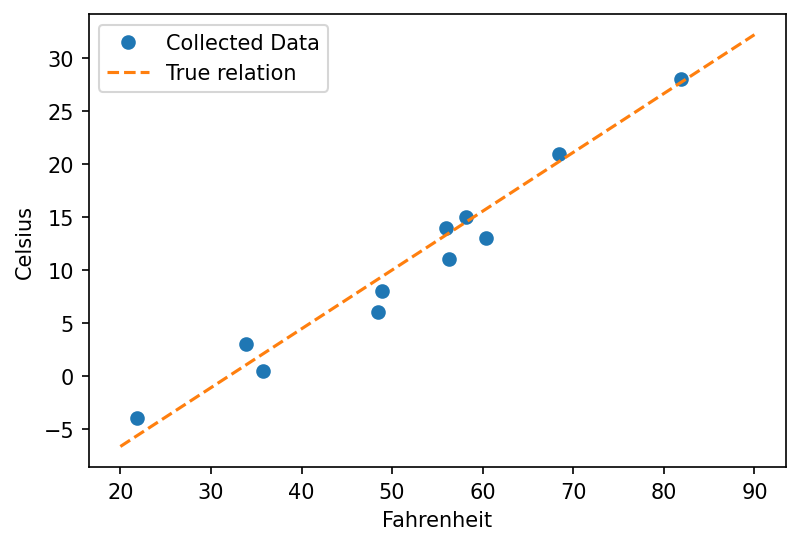

In [87]:
# Jaringan Syaraf?

# t_c: known temperature in Celsius
# t_u: 1 wall-mounted analog thermometer without unit

import numpy as np
from matplotlib import pyplot as plt

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_u_range = np.linspace(20., 90.)
t_c_range = (t_u_range -32) * 5/9

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u, t_c, 'o', label='Collected Data')
plt.plot(t_u_range, t_c_range, '--', label='True relation')
plt.legend(loc='best')

In [88]:
print('t_u as Numpy list:', t_u)

t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 
t_c = t_c.to(device)
t_u = t_u.to(device)

print("t_u after unsqueeze:\n", t_u)
t_u.shape

t_u as Numpy list: [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_u after unsqueeze:
 tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])


torch.Size([11, 1])

In [89]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  3,  2,  7,  1,  5,  6, 10,  4]), tensor([0, 9]))

In [91]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [93]:
# TRAIN YOUR NEURAL NETWORK!
import torch.nn as nn
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'InstanceNorm3d',
 'KLDivLoss',
 'L1Loss',
 

In [95]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model.to(device)

print(seq_model)

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)


In [97]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

seq_model.output_linear.bias

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


Parameter containing:
tensor([0.0157], requires_grad=True)

In [98]:
# TRAINING!
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [99]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):

        t_p_train = model(t_u_train) 
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) 
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))
            
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 196.33714294433594, Validation loss 76.69674682617188
Epoch 1000, Training loss 4.373893737792969, Validation loss 4.720809459686279
Epoch 2000, Training loss 2.646526336669922, Validation loss 10.008302688598633
Epoch 3000, Training loss 1.687429428100586, Validation loss 7.67008113861084
Epoch 4000, Training loss 1.5921249389648438, Validation loss 7.878535270690918
Epoch 5000, Training loss 1.3363287448883057, Validation loss 6.8492512702941895
output tensor([[ 2.3788],
        [15.3136]], grad_fn=<AddmmBackward>)
answer tensor([[ 0.5000],
        [13.0000]])
hidden tensor([[  0.4970],
        [  0.6455],
        [-10.7053],
        [  9.2601],
        [  0.9978],
        [  0.7319],
        [ -9.1184],
        [ -0.0323]])


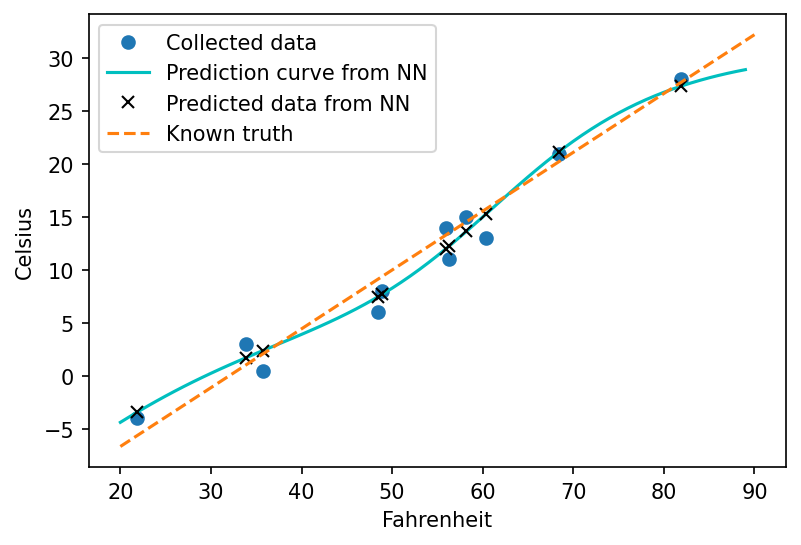

In [101]:
# VISUALIZE THE PREDICTION!

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
t_range = t_range.to(device)

t_u_range = np.linspace(20., 90.)
t_c_range = (t_u_range -32) * 5/9

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.cpu().numpy(), t_c.cpu().numpy(), 'o', label="Collected data")
plt.plot(t_range.cpu().numpy(), seq_model(0.1 * t_range).detach().cpu().numpy(), 'c-', label="Prediction curve from NN")
plt.plot(t_u.cpu().numpy(), seq_model(0.1 * t_u).detach().cpu().numpy(), 'kx', label="Predicted data from NN")
plt.plot(t_u_range, t_c_range, '--', label="Known truth")
plt.legend(loc='best')

Coded by ***Yehezk34***